In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

In [88]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(32, activation='relu'))
Dropout(0.5)
model.add(Dense(10, activation='softmax'))  

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/home/berna/venv-ardupilot/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Model compile and training 

In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


 modelin tahmin ettiği değer  ile gerçek etiket arasındaki farkı ölçer ve bir hata puanı üret loss

Eğitim verisi → Öğretir

Validation → Takip eder (overfitting var mı?)

Test → Sonuçları gösterir (gerçek başarı)

In [17]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# iyi bir yaklasım degil egitim sırasında test verisi kullanılması
#Model test verisini kısmen öğrenmiş olur 
# ezbere gibi olur 

Epoch 1/5


KeyboardInterrupt: 

In [91]:

history = model.fit(x_train,y_train,epochs=25,validation_split=0.2,callbacks=[early_stop])

#60.000 resimlik eğitim verimin %20’sini modelin performansını kontrol etmek için kenara ayırıyorum.
#Eğitimden sonra da ayrıca sakladığım x_test, y_test ile gerçek testi yapacağım


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8510 - loss: 0.5032 - val_accuracy: 0.9454 - val_loss: 0.1871
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9626 - loss: 0.1298 - val_accuracy: 0.9669 - val_loss: 0.1111
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9740 - loss: 0.0876 - val_accuracy: 0.9694 - val_loss: 0.1044
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9813 - loss: 0.0627 - val_accuracy: 0.9723 - val_loss: 0.0964
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9858 - loss: 0.0434 - val_accuracy: 0.9721 - val_loss: 0.0979
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9877 - loss: 0.0375 - val_accuracy: 0.9711 - val_loss: 0.1060
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9688 - val_loss: 0.1156


modelin softmax çıkışı → 10 elemanlı bir olasılık dizisi.
Her sayı, 0’dan 9’a kadar olan rakamların olasılık tahminidir.

Perform grafiks

In [92]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9721

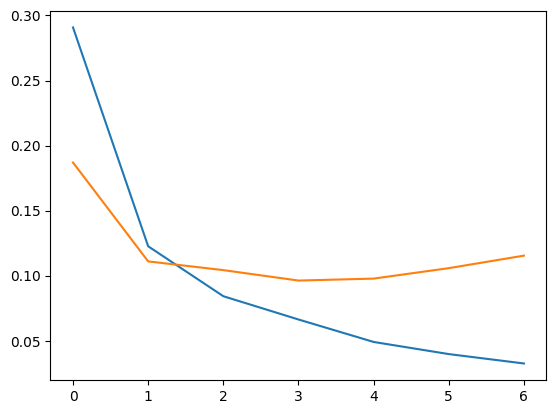

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

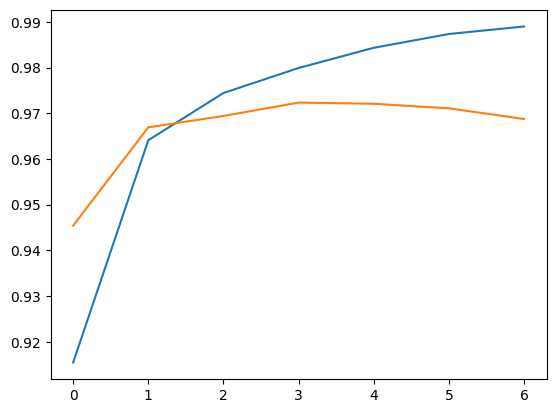

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.7418
R² Score: 0.9344


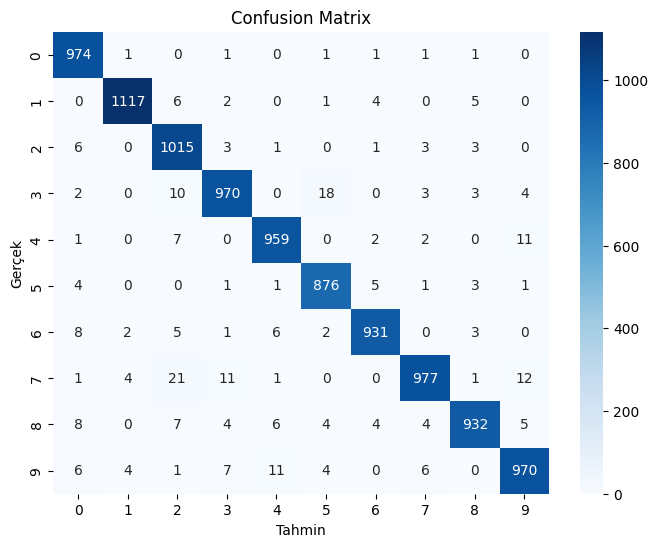

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


In [98]:
model.save("mnist_model.h5")